# Real estate commercial analysis

**Aim** - to analyze data from the Yandex Real Estate service and set parameters that affect the cost of objects.

**Data** - advertisements for the sale of apartments in St. Petersburg and neighboring settlements for 2014 - 2019.
The input data contains both data entered by the user and automatically received data.

**Main areas of research:**
- Determine what factors affect the cost of housing: number of rooms, floor, ceiling height, distance from the center, date of placement of the ad.
- Select the most and least popular areas, compare their prices.
- Assess the real estate market in the center of St. Petersburg.
- Compare the overall findings with the dependency analysis at the center.

**The study contains the following steps:**
1. Data review.
2. Data preprocessing.
3. Hypothesis testing.

## Load libraries & data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Resume**

- The data contains information about 23699 properties.
- There are 22 columns in the table, including 2 boolean types, 14 - float, 3 - int, 3 - object.
- The names of the columns are informative and correspond to the style.
- There are missing values in few columns.

*The first stage of the project will be data preprocessing to remove and evaluate the impact of omissions, as well as correct data types.*

## Feature engineering

### Missing values

In [4]:
pd.DataFrame(df.isna().mean().round(4)*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
is_apartment,88.290000
parks_nearest,65.910000
ponds_nearest,61.560000
balcony,48.610000
ceiling_height,38.800000
airports_nearest,23.380000
cityCenters_nearest,23.290000
parks_around3000,23.280000
ponds_around3000,23.280000
days_exposition,13.420000


#### Ceiling height

In [5]:
print(f"Percentage of missing values in ceiling_height {1 - df['ceiling_height'].count() / df['total_images'].count():.01%}")

Percentage of missing values in ceiling_height 38.8%


In [6]:
df[df['ceiling_height'] > 4].sort_values('ceiling_height').tail(20)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18545,6,3750000.0,43.0,2019-03-18T00:00:00,2,25.0,5.0,29.0,3,False,...,NaN,NaN,Санкт-Петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12.0
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
14382,9,1700000.0,35.0,2015-12-04T00:00:00,1,25.0,5.0,20.0,2,False,...,8.0,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206.0
11285,0,1950000.0,37.0,2019-03-20T00:00:00,1,25.0,5.0,17.0,4,False,...,9.0,2.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,18.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0


There are a small number of outliers, we will not touch them, they will not greatly affect the median value.

In [7]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isna().sum()


0

#### Floors total

In [8]:
print(f"Percentage of missing values in floors_total {1 - df['floors_total'].count() / df['total_images'].count():.01%}")

Percentage of missing values in floors_total 0.4%


Since very few values are missing and there is no way to fill missing values with adequate values, these rows are removed so as not to affect further analysis.

In [9]:
df.dropna(subset=['floors_total'], inplace=True)
df['floors_total'].isna().sum()

0

#### Living area

In [10]:
print(f"Percentage of missing values in living_area {1 - df['living_area'].count() / df['total_images'].count():.01%}")


Percentage of missing values in living_area 7.9%


In [11]:
df['living_area'].sort_values().value_counts()


18.000000     882
17.000000     674
30.000000     598
16.000000     484
20.000000     481
             ... 
26.599998       1
26.510000       1
54.430000       1
54.480000       1
409.700000      1
Name: living_area, Length: 1769, dtype: int64

1. Calculate the median for all shares of living space from the total area of the premises
2. Find the value of the missed living area using the median
3. Fill in the missing values with these values

In [12]:
df['living_area'] = df['living_area'].fillna((df['living_area']/df['total_area']).median() * df['total_area'])
df['living_area'].isna().sum()

0

#### Apartment type

In [13]:
print(f"Доля пропущенных значений в столбце is_apartment {1 - df['is_apartment'].count() / df['total_images'].count():.01%}")


Доля пропущенных значений в столбце is_apartment 88.2%


Видимо, столбец апартаменты добавили позже, поэтому основная часть записей незаполнена. Так как нам не нужно исследовать данные параметр, оставим его как есть.

####  Площадь кухни

In [14]:
print(f"Percentage of missing values in kitchen_area {1 - df['kitchen_area'].count() / df['total_images'].count():.01%}")

Percentage of missing values in kitchen_area 9.4%


In [15]:
df.loc[df['studio'] == True, 'kitchen_area'] = 0

df['kitchen_area'] = df['kitchen_area'].fillna((df['kitchen_area']/df['total_area']).median() * df['total_area'])

df['kitchen_area'].isna().sum()


0

#### Amount of balcony

In [16]:
print(f"Percentage of missing values in balcony {1 - df['balcony'].count() / df['total_images'].count():.01%}")


Percentage of missing values in balcony 48.6%


We can assume that if a person did not indicate the number of balconies, then most likely they are not in the room at all. Let's fill it with 0.

In [17]:
df['balcony'].fillna(0, inplace=True)
df['balcony'].isna().sum()


0

#### Locality

In [18]:
print(f"Percentage of missing values in locality_name {1 - df['locality_name'].count() / df['total_images'].count():.01%}")


Percentage of missing values in locality_name 0.2%


Since very few values are missing and there is no way to fill in the gaps with adequate values, these rows are removed so as not to affect further analysis.

In [19]:
df.dropna(subset=['locality_name'], inplace=True)
df['locality_name'].isna().sum()


0

#### Airports

In [20]:
print(f"Percentage of missing values in airports_nearest {1 - df['airports_nearest'].count() / df['total_images'].count():.01%}")


Percentage of missing values in airports_nearest 23.4%


These values will not be needed for the analysis, we will leave them as they are.

#### Distance to the center

In [21]:
print(f"Percentage of missing values in cityCenters_nearest {1 - df['cityCenters_nearest'].count() / df['total_images'].count():.01%}")


Percentage of missing values in cityCenters_nearest 23.3%


#### Parks within a radius of 3 km

In [22]:
print(f"Percentage of missing values in parks_around3000 {1 - df['parks_around3000'].count() / df['total_images'].count():.01%}")


Percentage of missing values in parks_around3000 23.3%


#### Distance to nearest park

In [23]:
print(f"Percentage of missing values in parks_nearest {1 - df['parks_nearest'].count() / df['total_images'].count():.01%}")


Percentage of missing values in parks_nearest 65.9%


#### Ponds within a radius of 3 km

In [24]:
print(f"Percentage of missing values in ponds_around3000 {1 - df['ponds_around3000'].count() / df['total_images'].count():.01%}")


Percentage of missing values in ponds_around3000 23.3%


#### Distance to nearest pond

In [25]:
print(f"Percentage of missing values in ponds_nearest {1 - df['ponds_nearest'].count() / df['total_images'].count():.01%}")


Percentage of missing values in ponds_nearest 61.7%


#### Duration of ad placement (from publication to removal)

In [26]:
print(f"Percentage of missing values in days_exposition {1 - df['days_exposition'].count() / df['total_images'].count():.01%}")


Percentage of missing values in days_exposition 13.5%


In [27]:
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())
df['days_exposition'].isna().sum()


0

### Replacing the data type

In [28]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')


### Resume

**1. Missing values**
- *Height of ceilings:* 38.8% of values were missing. Missing values were replaced by the total median. Outliers (too high and low values) were also found, which is probably due to data entry errors.
- *Number of floors in the house:* missing 0.4% of the values. Since there are not very many missing values, all rows with missing data were deleted so that they would not affect the further construction of hypotheses.
- *Living area and kitchen area:* 7.9% and 9.4% of values are missing, respectively. To fill in the data, the median share of the living quarters or kitchen area from the total area was found, then, based on this value and the values of the entire area, the necessary values for processing gaps were found.
- *Room type:* missing 88.2% of values. Apparently, the apartments column was added later, so most of the entries are empty. Since we do not need to explore this parameter, we will leave it as it is.
- *Number of balconies:* 48.6% of values are missing. We can assume that the lack of information about the number of balconies indicates their absence in the apartment, so we replace all gaps with 0.
- *Locality name:* missing 0.2% of values. We need this information to confirm hypotheses, so we delete rows with missing values.
- *Distance to city center, distance to nearest airport, number of parks within 3km radius, distance to nearest park, number of bodies of water within 3km radius, distance to nearest body of water:* There are quite a few missing values in these columns, but they are missing in this study will not affect the analysis in any way, so we will leave it as it is.
- *Duration of ad placement:* 13.5% of values are missing. Replace gaps with the median value.

**2. Type**
- - In the column with *date of posting*, the data type has been changed from a string to a date format. Removed time values as they are not used.

Let's add the following columns to the table:
- price per square meter;
- day of the week, month and year of publication of the announcement;
- apartment floor category (first, last, other);
- the ratio of residential and total area;
- the ratio of the area of the kitchen to the total.

### Price per square meter

In [29]:
 df['square_meter_price'] = df['last_price'] / df['total_area'].astype('int')


### Week, month and year of publication

In [30]:
df['day_of_exposition'] = df['first_day_exposition'].dt.weekday
df['month_of_exposition'] = df['first_day_exposition'].dt.month
df['year_of_exposition'] = df['first_day_exposition'].dt.year


### Floor

In [31]:
def floor_group(row):
    floor = row['floor']
    floor_total = row['floors_total']
    if floor <= 1:
        return 'первый'
    elif floor == floor_total:
        return 'последний'
    else:
        return 'другой'
    
df['floor_category'] = df.apply(floor_group, axis=1)


### Ratio of residential and total area

In [32]:
df['ratio_of_living_area'] = df['living_area'] / df['total_area']
df['ratio_of_kitchen_area'] = df['kitchen_area'] / df['total_area']

## Exploratory Data Analysis

### Distribution

#### Square

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

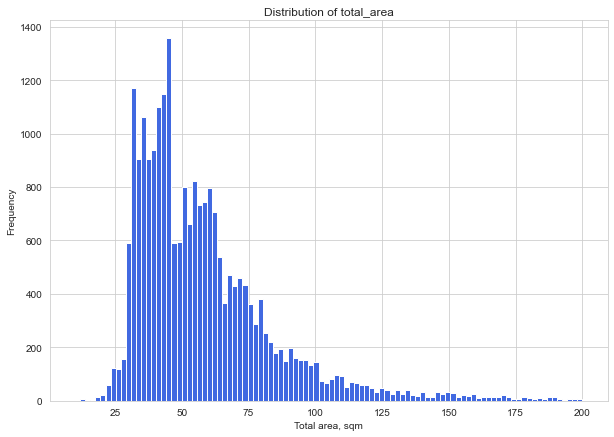

In [33]:
df.plot(y='total_area',
        kind='hist',
        bins=100,
        grid=True,
        figsize=(10, 7),
        range=(10, 200),
        legend=False,
        color='royalblue')
plt.title('Distribution of total_area')
plt.xlabel('Total area, sqm')
plt.ylabel('Frequency')

df['total_area'].describe()


The histogram looks like a normal distribution. A wide peak is from 30 to 75, then there is a decrease in the number of values to 200 sq.m., individual emissions are observed up to 900 sq.m.

#### Price

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

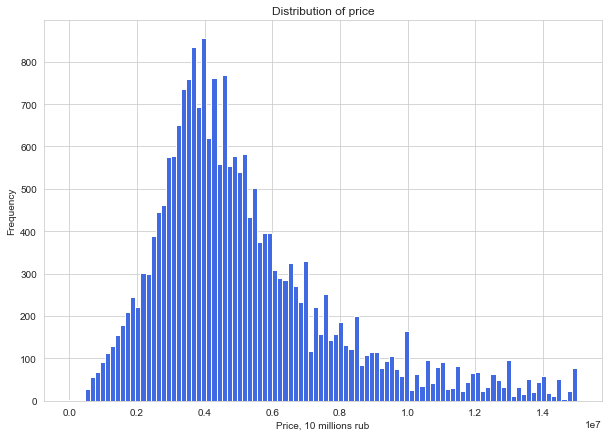

In [34]:
df.plot(y='last_price',
        kind='hist',
        bins=100,
        grid=True,
        figsize=(10, 7),
        range=(0,15000000),
        legend=False,
        color='royalblue')
plt.title('Distribution of price')
plt.xlabel('Price, 10 millions rub')
plt.ylabel('Frequency')

df['last_price'].describe()


The data is OK, but the values are displayed in exponential notation. The mean value is 6.5 million, the median is 4.6 million.

#### Rooms

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

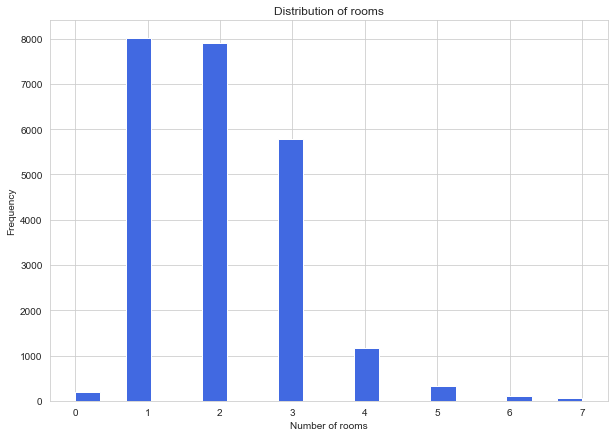

In [35]:
df.plot(y='rooms', 
        kind='hist', 
        bins=20, 
        grid=True, 
        figsize=(10, 7),
        range=(0, 7),
        legend=False, 
        color='royalblue')
plt.title('Distribution of rooms')
plt.xlabel('Number of rooms')
plt.ylabel('Frequency')

df['rooms'].describe()


Most of all one- and two-room apartments. There are anomalous values (19 rooms).

#### Ceiling height

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

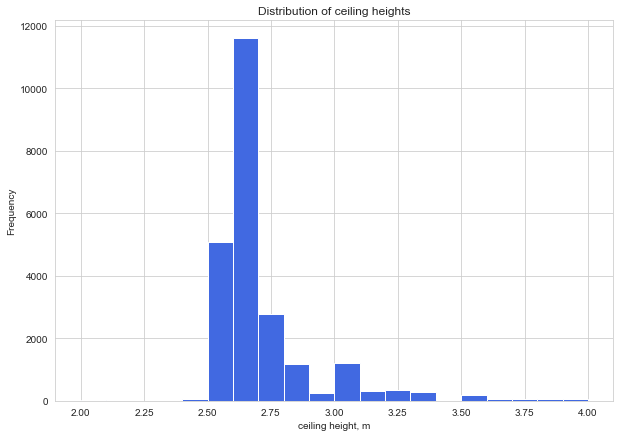

In [36]:
df.plot(y='ceiling_height',
        kind='hist',
        bins=20,
        grid=True,
        figsize=(10,7),
        range=(2, 4),
        legend=False,
        color='royalblue')
plt.title('Distribution of ceiling heights')
plt.xlabel('ceiling height, m')
plt.ylabel('Frequency')

df['ceiling_height'].describe()


The average ceiling height is 2.7 m. There are outliers (1 and 100 m).

#### Duration of publication

count    23565.000000
mean       169.203692
std        206.497729
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

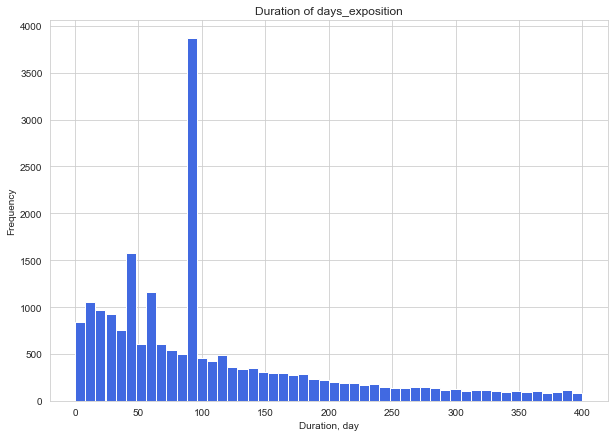

In [37]:
df.plot(y='days_exposition',
        kind='hist',
        bins=50,
        grid=True,
        figsize=(10, 7),
        range=(0, 400),
        legend=False, 
        color='royalblue')
plt.title('Duration of days_exposition')
plt.xlabel('Duration, day')
plt.ylabel('Frequency')

df['days_exposition'].describe()

There are outliers at 45, 60 and 90 days. But it is not clear where they came from: this may be due to the rules for placing ads on the site. We will not do anything with them, since these may include real sales.
We can say that sales within 30 days are considered too fast, and within 200 days too long.

**Resume**

*The most likely characteristics of the apartments for sale are:*
* Area - 52 sq m
* Cost - 4.6 million rubles
* Number of rooms - 2
* Ceiling height - 2.65 m
* Sold in 95 days

*All studied parameters have anomalous values:*
* Area over 150 sq m
* More than 6 rooms in the apartment
* Ceiling heights less than 2.5 m and more than 2.75 m
* The ad hangs on the site for less than 30 days or more than 200

### Outliers

In [38]:
good_df = df.query('total_area < 150 & rooms < 8 & ceiling_height > 2.5')

print('Percentage of final data: {:.1%}'. format(len(good_df) / len(df)))


Percentage of final data: 82.3%


## Factors affecting cost

#### The dependence of the price on the area

In [39]:
pivot_table_total_area = good_df.pivot_table(index='total_area',
                                             values='last_price',
                                             aggfunc=['count', 'median'])
pivot_table_total_area.columns = ['count', 'median']
pivot_table_total_area = pivot_table_total_area.sort_values('count', ascending = False).query('median < 7000000')

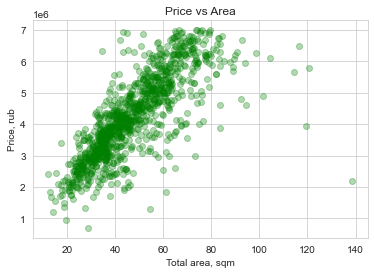

In [40]:
pivot_table_total_area.plot(y='median', style='go', alpha=0.3, legend=False)
plt.xlabel('Total area, sqm')
plt.ylabel('Price, rub')
plt.title('Price vs Area')
plt.show()

In [41]:
good_df['last_price'].corr(good_df['total_area'])

0.6951157219936768

We looked at the dependence of the cost of an apartment on the total area. The Pearson coefficient is 0.7, that is, there is a correlation - the larger the area of the apartment, the higher the cost.

#### The dependence of the price on rooms

In [42]:
pivot_table_rooms = good_df.pivot_table(index='rooms',
                                        values='last_price',
                                        aggfunc=['count', 'median'])
pivot_table_rooms.columns = ['count', 'median']
pivot_table_rooms = pivot_table_rooms.sort_values('rooms', ascending=False)


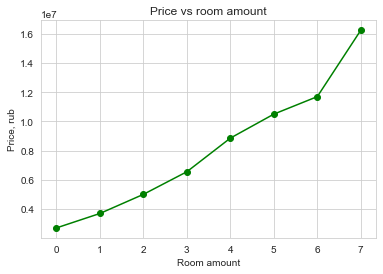

In [43]:
pivot_table_rooms.plot(y='median', style='g-o', legend=False)
plt.xlabel('Room amount')
plt.ylabel('Price, rub')
plt.title('Price vs room amount')
plt.show()


In [44]:
good_df['rooms'].corr(good_df['last_price'])

0.41500637910837906

The Pierce coefficient is not very high, there is a relationship between the cost of housing and the number of rooms, but less than the total area.

#### Dependence of price on distance from the center

-0.3164411353880013

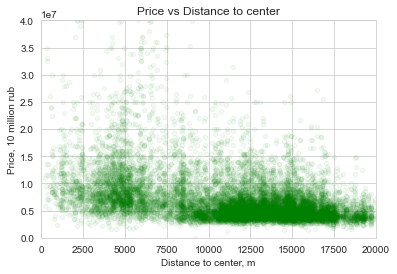

In [45]:
good_df.plot(kind='scatter',
             y='last_price',
             x='cityCenters_nearest',
             alpha=0.05,
             ylim=(0, 40000000),
             xlim=(0, 20000),
             color='green')
plt.xlabel('Distance to center, m')
plt.ylabel('Price, 10 million rub')
plt.title('Price vs Distance to center')

good_df['last_price'].corr(good_df['cityCenters_nearest'])


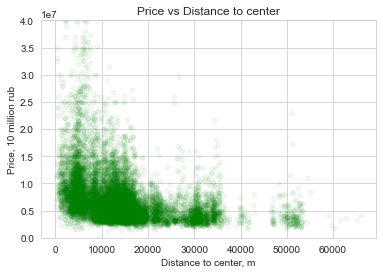

In [46]:
good_df.plot(kind='scatter',
             y='last_price',
             x='cityCenters_nearest',
             alpha=0.05,
             ylim=(0, 40000000),
             color='green')
plt.xlabel('Distance to center, m')
plt.ylabel('Price, 10 million rub')
plt.title('Price vs Distance to center')
plt.show()

The cost almost does not depend on the distance to the city center.

#### Dependence of price on floor category

In [47]:
pivot_table_floors = good_df.pivot_table(index='floor_category',
                                         values='last_price',
                                         aggfunc=['count', 'median'])
pivot_table_floors.columns = ['count', 'median']
pivot_table_floors = pivot_table_floors.sort_values('median', ascending = False)
pivot_table_floors


,count,median
floor_category,,
другой,14520,4950000.0
последний,2568,4435000.0
первый,2316,4000000.0


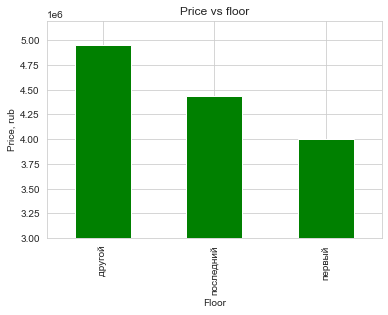

In [48]:
pivot_table_floors.plot(y='median',
                        kind='bar',
                        ylim=(3000000),
                        legend=False,
                        color='green')
plt.xlabel('Floor')
plt.ylabel('Price, rub')
plt.title('Price vs floor')
plt.show()

Apartments on the first floor are the cheapest.

#### Dependence on the date of placement: day of the week, month and year

In [49]:
pivot_table_weekday_exposition = good_df.pivot_table(index='day_of_exposition',
                                                     values='last_price',
                                                     aggfunc=['count', 'median'])
pivot_table_weekday_exposition.columns = ['count', 'median']
pivot_table_weekday_exposition.sort_values('median', ascending=False)


,count,median
day_of_exposition,,
1,3433,4890000.0
2,3254,4850000.0
0,2894,4800000.0
3,3530,4800000.0
4,3321,4700000.0
5,1579,4650000.0
6,1393,4600000.0


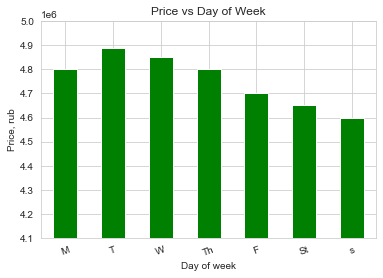

In [50]:
pivot_table_weekday_exposition.plot(y='median',
                                    kind='bar',
                                    ylim=(4100000, 5000000),
                                    legend=False,
                                    color='green')
plt.xlabel('Day of week')
plt.ylabel('Price, rub')
plt.title('Price vs Day of Week')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['M', 'T', 'W', 'Th', 'F', 'St', 's'],
       rotation=20)
plt.show()

In [51]:
pivot_table_month_exposition = good_df.pivot_table(index='month_of_exposition',
                                                   values='last_price',
                                                   aggfunc=['count', 'median'])
pivot_table_month_exposition.columns = ['count', 'median']
pivot_table_month_exposition.sort_values('median', ascending=False)


,count,median
month_of_exposition,,
4,1932,4999000.0
3,2041,4850000.0
9,1621,4820000.0
1,1226,4800000.0
2,2145,4800000.0
11,1951,4800000.0
12,1371,4780000.0
7,1389,4750000.0
8,1436,4750000.0


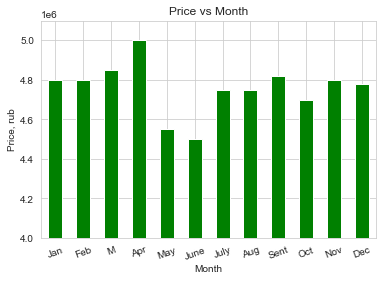

In [52]:
pivot_table_month_exposition.plot(y='median',
                                  kind='bar',
                                  ylim=(4000000, 5100000),
                                  legend=False,
                                  color='green')
plt.xlabel('Month')
plt.ylabel('Price, rub')
plt.title('Price vs Month')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['Jan', 'Feb', 'M', 'Apr', 'May', 'June', 'July', 'Aug', 'Sent', 'Oct', 'Nov', 'Dec'],
       rotation=20)
plt.show()

In [53]:
pivot_table_year_exposition = good_df.pivot_table(index='year_of_exposition',
                                                  values='last_price',
                                                  aggfunc=['count', 'median', 'mean'])
pivot_table_year_exposition.columns = ['count', 'median', 'mean']
pivot_table_year_exposition.sort_values('median', ascending=False)


,count,median,mean
year_of_exposition,,,
2014,113,7500000.0,9.980052e+06
2019,2170,5355000.0,6.517179e+06
2015,1016,5312500.0,6.800520e+06
2018,6718,4750000.0,5.828798e+06
2016,2386,4600000.0,5.962921e+06
2017,7001,4580000.0,5.801044e+06


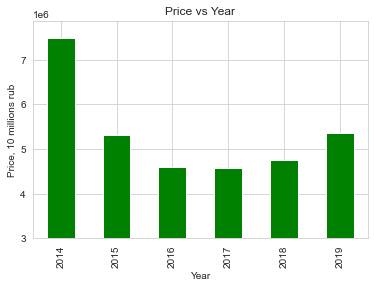

In [54]:
pivot_table_year_exposition.plot(y='median',
                                 kind='bar',
                                 ylim=(3000000),
                                 legend=False,
                                 color='green')
plt.xlabel('Year')
plt.ylabel('Price, 10 millions rub')
plt.title('Price vs Year')
plt.show()

**Resume**
1. The strongest correlation with the cost of an apartment is typical for the total area and number of rooms.
2. The distance to the city center does not affect much (Pierce coefficient = - 0.3).
3. The first and last floors are cheaper than the rest.
4. There is no strong dependence on the day of the week. Mondays and Thursdays are a bit ahead.
5. Demand for apartments grows until April, then drops sharply in May and slowly increases.
6. In 2014, apartment prices were much higher due to the economic situation in the country.

## Top popular localities

In [55]:
pivot_table_price_per_sqm = good_df.pivot_table(index='locality_name',
                                                values='square_meter_price',
                                                aggfunc=['count', 'median'])
pivot_table_price_per_sqm.columns = ['count', 'median']
pivot_table_price_per_sqm = pivot_table_price_per_sqm.sort_values('count', ascending=False).head(10)
pivot_table_price_per_sqm


,count,median
locality_name,,
Санкт-Петербург,12978,106250.000000
посёлок Мурино,512,86410.969793
посёлок Шушары,410,77111.546686
Всеволожск,365,66216.216216
посёлок Парголово,311,92352.941176
деревня Кудрово,298,92619.821078
Пушкин,280,101102.228682
Гатчина,236,68414.188837
Колпино,233,75000.000000


In [56]:
pivot_table_price_per_sqm[pivot_table_price_per_sqm['median'] == pivot_table_price_per_sqm['median'].max()]


,count,median
locality_name,,
Санкт-Петербург,12978,106250.0


In [57]:
pivot_table_price_per_sqm[pivot_table_price_per_sqm['median'] == pivot_table_price_per_sqm['median'].min()]


,count,median
locality_name,,
Выборг,194,58320.512821


**Resume**

**Highlighted the 10 most popular places:**
- the most popular area - St. Petersburg, 5238 ads
- in last place - Vyborg, 117 ads

**The same trend is observed for price distribution:**
- St. Petersburg - 103125 rubles per sq m
- Vyborg - 58666 rubles per sq m

## Apartments in the center of St. Petersburg

#### Choice of the center of St. Petersburg

In [58]:
# meter to kilometer
good_df['cityCenters_nearest_km'] = np.floor(good_df['cityCenters_nearest'] / 1000)

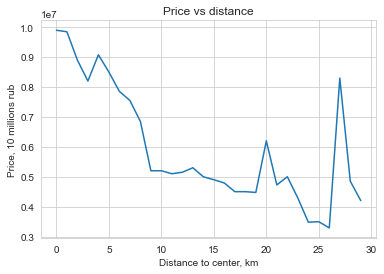

In [59]:
spb_good_df = good_df.query('locality_name == "Санкт-Петербург" & cityCenters_nearest_km.notna()', engine='python')
pivot_table_center_spb = (spb_good_df.pivot_table(index='cityCenters_nearest_km', 
                                                  values='last_price', 
                                                  aggfunc='median').
                         plot(legend=False)
                         )

plt.xlabel('Distance to center, km')
plt.ylabel('Price, 10 millions rub')
plt.title('Price vs distance')

plt.show()


Under the city center we will take a radius of 5 km.

#### Distribution of some parameters in the center of St. Petersburg

In [60]:
center_spb_good_df = spb_good_df.query('cityCenters_nearest_km <= 5')


##### Area

count    2409.000000
mean       79.024143
std        28.926047
min        12.000000
25%        57.000000
50%        76.000000
75%        98.500000
max       149.200000
Name: total_area, dtype: float64

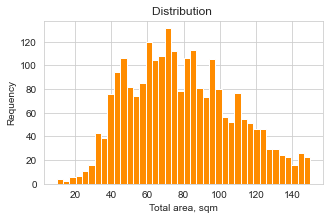

In [61]:
center_spb_good_df.plot(y='total_area',
                        kind='hist', 
                        bins=40, 
                        grid=True, 
                        figsize=(5, 3), 
                        range=(10, 150), 
                        legend=False, 
                        color='darkorange')
plt.title('Distribution ')
plt.xlabel('Total area, sqm')
plt.ylabel('Requency')

center_spb_good_df['total_area'].describe()


We observe a normal distribution, the bulk of housing has an area of 50 to 90 square meters.

##### Price

count    2.409000e+03
mean     1.073505e+07
std      7.403570e+06
min      1.600000e+06
25%      6.700000e+06
50%      8.800000e+06
75%      1.220000e+07
max      1.240000e+08
Name: last_price, dtype: float64

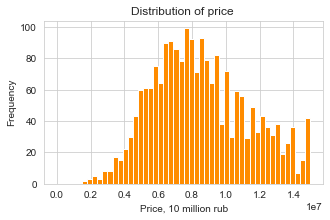

In [62]:
center_spb_good_df.plot(y='last_price',
                        kind='hist',
                        bins=50,
                        grid=True,
                        figsize=(5, 3),
                        range=(0, 15000000),
                        legend=False,
                        color='darkorange')
plt.title('Distribution of price ')
plt.xlabel('Price, 10 million rub')
plt.ylabel('Frequency')

center_spb_good_df['last_price'].describe()


The distribution is also similar to normal. Basically, prices range from 5 to 11 million rubles.

##### Ceiling height

count    2409.000000
mean        2.976276
std         0.844719
min         2.510000
25%         2.650000
50%         2.860000
75%         3.160000
max        32.000000
Name: ceiling_height, dtype: float64

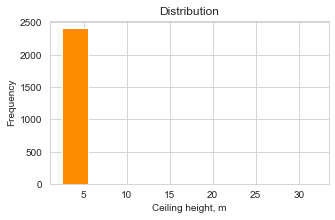

In [63]:
center_spb_good_df.plot(y='ceiling_height',
                        kind='hist',
                        figsize=(5, 3),
                        grid=True,
                        legend=False,
                        color='darkorange')
plt.title('Distribution')
plt.xlabel('Ceiling height, m')
plt.ylabel('Frequency')

center_spb_good_df['ceiling_height'].describe()


The average ceiling height is 2.65 m.

##### Rooms

count    2409.000000
mean        2.630967
std         1.111502
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         7.000000
Name: rooms, dtype: float64

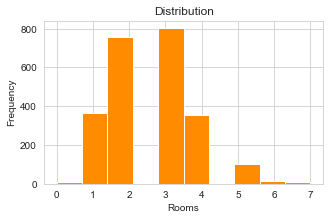

In [64]:
center_spb_good_df.plot(y='rooms',
                        kind='hist',
                        figsize=(5, 3),
                        grid=True,
                        legend=False,
                        color='darkorange')
plt.title('Distribution')
plt.xlabel('Rooms')
plt.ylabel('Frequency')

center_spb_good_df['rooms'].describe()


Most of all two- and three-room apartments.

**Resume**

The most likely characteristics of an apartment for sale in the center of St. Petersburg:
1. Area - 72 sq m
2. Cost - 8.5 million rubles
3. Ceiling height - 2.65 m
4. Number of rooms - 2

#### Factors that affect the cost of housing in the center of St. Petersburg

#####  Rooms

In [65]:
center_spb_rooms = center_spb_good_df.pivot_table(index='rooms',
                                                  values='last_price',
                                                  aggfunc=['count', 'median'])
center_spb_rooms.columns = ['count', 'median']
center_spb_rooms


,count,median
rooms,,
0,11,3200000.0
1,364,6100000.0
2,755,8000000.0
3,801,9640000.0
4,356,11000000.0
5,102,11150000.0
6,13,12000000.0
7,7,15000000.0


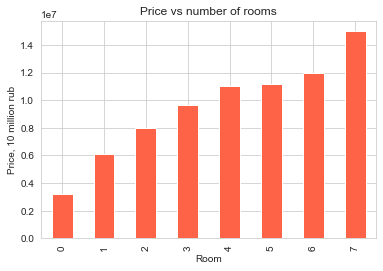

In [66]:
center_spb_rooms.plot(y='median',
                      kind='bar',
                      grid=True,
                      legend=False,
                      color='tomato')
plt.title('Price vs number of rooms')
plt.xlabel('Room')
plt.ylabel('Price, 10 million rub')
plt.show()

There ia a clear dependence of the cost of housing on the number of rooms.

##### Floor

In [67]:
center_spb_floor = center_spb_good_df.pivot_table(index='floor_category', values='last_price', aggfunc=['count', 'median'])
center_spb_floor.columns = ['count', 'median']
center_spb_floor


,count,median
floor_category,,
другой,1678,9200000.0
первый,307,6740000.0
последний,424,8810000.0


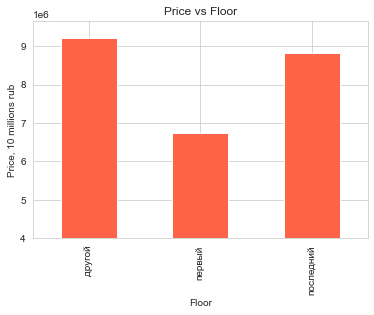

In [68]:
center_spb_floor.plot(y='median',
                      kind='bar',
                      ylim=(4000000),
                      legend=False,
                      grid=True,
                      color='tomato')
plt.title('Price vs Floor')
plt.xlabel('Floor')
plt.ylabel('Price, 10 millions rub')
plt.show()

The cheapest apartments are on the first floor

##### Distance to the center

In [69]:
center_spb_center = center_spb_good_df.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['count', 'median'])
center_spb_center.columns = ['count', 'median']
center_spb_center


,count,median
cityCenters_nearest_km,,
0.0,69,9900000.0
1.0,196,9850000.0
2.0,258,8900000.0
3.0,464,8200000.0
4.0,777,9080000.0
5.0,645,8500000.0


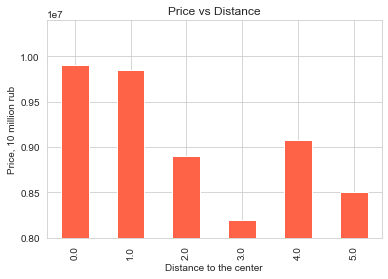

In [70]:
center_spb_center.plot(y='median',
                       kind='bar',
                       ylim=(8000000),
                       grid=True,
                       legend=False,
                       color='tomato')
plt.title('Price vs Distance')
plt.xlabel('Distance to the center')
plt.ylabel('Price, 10 million rub')
plt.show()

The most expensive apartments are within a radius of 1 km, then the cost does not change much.

##### Day of exposition

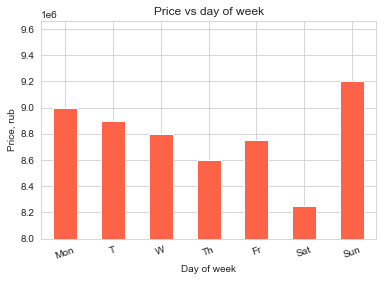

In [71]:
center_spb_weekday_exposition = center_spb_good_df.pivot_table(index='day_of_exposition',
                                                               values='last_price',
                                                               aggfunc=['count', 'median'])
center_spb_weekday_exposition.columns = ['count', 'median']
center_spb_weekday_exposition.plot(y='median',
                                   kind='bar',
                                   ylim=(8000000),
                                   grid=True,
                                   legend=False,
                                   color='tomato')
plt.xlabel('Day of week')
plt.ylabel('Price, rub')
plt.title('Price vs day of week')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'T', 'W', 'Th', 'Fr', 'Sat', 'Sun'],
       rotation=20)
plt.show()

No obvious correlation is observed. On Sunday apartments are sold more expensive.

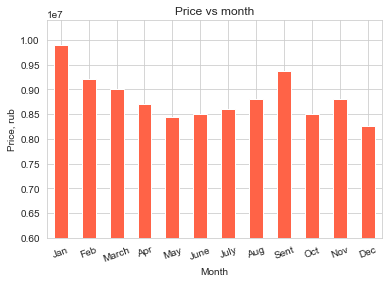

In [72]:
center_spb_month_exposition = center_spb_good_df.pivot_table(index='month_of_exposition',
                                                             values='last_price',
                                                             aggfunc=['count', 'median'])
center_spb_month_exposition.columns = ['count', 'median']
center_spb_month_exposition.plot(y='median',
                                 kind='bar',
                                 ylim=(6000000),
                                 grid=True,
                                 legend=False,
                                 color='tomato')
plt.xlabel('Month')
plt.ylabel('Price, rub')
plt.title('Price vs month')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           ['Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'July', 'Aug', 'Sent', 'Oct', 'Nov', 'Dec'],
           rotation=20)
plt.show()

No obvious correlation is observed. In June, most apartments were sold.

,count,median
year_of_exposition,,
2014,16,17645000.0
2015,217,9750000.0
2016,341,8700000.0
2017,856,8500000.0
2018,726,8825000.0
2019,253,9476000.0


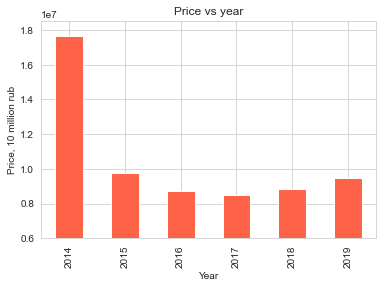

In [73]:
center_spb_year_exposition = center_spb_good_df.pivot_table(index='year_of_exposition',
                                                            values='last_price',
                                                            aggfunc=['count', 'median'])
center_spb_year_exposition.columns = ['count', 'median']
center_spb_year_exposition.plot(y='median',
                                kind='bar',
                                ylim=(6000000),
                                legend=False,
                                grid=True,
                                color='tomato')
plt.xlabel('Year')
plt.ylabel('Price, 10 million rub')
plt.title('Price vs year')

center_spb_year_exposition

No obvious correlation is observed. In 2015, there was a peak in sales.

**Resume**

1. We observe a clear direct dependence of the cost of apartments on the number of rooms. The most expensive will be five-room apartments. This behavior is also typical for the general sample.
2. Apartments on the ground floor are on average cheaper than those on the top floor. And apartments on other floors are the most expensive. There are no significant differences from the entire sample of apartments.
3. The most expensive apartments are within a radius of 1 km, much less further, but approximately on the same level. As in the general sample, no strong dependence is observed.
4. There is no obvious relationship between the date of publication of the announcement and the cost of the apartment. There are small rises in prices on Sundays, as well as in March and June. There was a slight decline after 2016, but then prices rose again. The same behavior is typical for the general sample over the years.

## Conclusion

**Factors that affect the cost of an apartment include:**
- The total area of the apartment
- Number of rooms
- Floor (apartments on the first and last are cheaper)
- Distance to the city center (apartments outside a radius of 5 km are cheaper by 4 million rubles)

     - *Average cost of an apartment in the center* - 8.5 million rubles with an area of 72 sq.m.
     - *The average cost of an apartment in St. Petersburg and the Leningrad Region* - 4.6 million rubles with an area of 52 sq.m.

- In 2014-2015 there was a sharp decline in real estate prices. By 2019, prices have stabilized and are steadily rising.

**There are several problems in the analyzed data that can be eliminated at the filling stage:**
- Anomalies in the ceiling heights are associated with manual input, you need to put restrictions on the values
- Missing values in the `balcony` column can be fixed by making this cell mandatory
- There are problems with the data in the `days_exposition` column. It is not clear for what reasons the publication was removed: the sale took place or these are the rules of the service